In [2]:
from deap import tools, base
from multiprocessing import Pool
# from ga_scheme import eaMuPlusLambda
from deap.algorithms import eaMuPlusLambda
from numpy import random as rnd
import numpy as np
from deap import creator
from deap import benchmarks

creator.create("BaseFitness", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.BaseFitness)

In [3]:



def mutation(individual):
    n = len(individual)
    for i in range(n):
        if rnd.random() < n * 0.15:
            individual[i] += rnd.normal(0.0, 0.2)
            individual[i] = np.clip(individual[i], -5, 5)
    return individual,


class SimpleGAExperiment:
    def factory(self):
        return rnd.random(self.dimension) * 10 - 5

    def __init__(self, function, dimension, pop_size, iterations):
        self.pop_size = pop_size
        self.iterations = iterations
        self.mut_prob = 0.6
        self.cross_prob = 0.3

        self.function = function
        self.dimension = dimension

        # self.pool = Pool(5)
        self.engine = base.Toolbox()
        # self.engine.register("map", self.pool.map)
        self.engine.register("map", map)
        self.engine.register("individual", tools.initIterate, creator.Individual, self.factory)
        self.engine.register("population", tools.initRepeat, list, self.engine.individual, self.pop_size)
        self.engine.register("mate", tools.cxOnePoint)
        self.engine.register("mutate", tools.mutGaussian, mu=0, sigma=0.9, indpb=0.05)
        # self.engine.register("mutate", tools.mutFlipBit, indpb=0.2)
        # self.engine.register("mutate", mutation)
        self.engine.register("select", tools.selTournament, tournsize=30)
        # self.engine.register("select", tools.selRoulette)
        self.engine.register("evaluate", self.function)


    def run(self):
        pop = self.engine.population()
        hof = tools.HallOfFame(3, np.array_equal)
        stats = tools.Statistics(lambda ind: ind.fitness.values[0])
        stats.register("avg", np.mean)
        stats.register("std", np.std)
        stats.register("min", np.min)
        stats.register("max", np.max)

        pop, log = eaMuPlusLambda(pop, self.engine, mu=self.pop_size, lambda_=int(self.pop_size*0.8), cxpb=self.cross_prob, mutpb=self.mut_prob,
                                  ngen=self.iterations,
                                  stats=stats, halloffame=hof, verbose=True)
        print("Best = {}".format(hof[0]))
        print("Best fit = {}".format(hof[0].fitness.values[0]))
        return log


gen	nevals	avg    	std     	min    	max    
0  	100   	3.90547	0.157406	3.58308	4.31735
1  	75    	4.2332 	0.0688292	4.08618	4.31735
2  	71    	4.35522	0.0355673	4.31735	4.41561
3  	75    	4.45726	0.0544213	4.40841	4.56707
4  	72    	4.57026	0.00543082	4.56608	4.58029
5  	75    	4.61699	0.02602   	4.57787	4.65756
6  	72    	4.67612	0.017184  	4.65094	4.70159
7  	75    	4.72463	0.0188119 	4.70159	4.75452
8  	75    	4.76641	0.0106444 	4.75452	4.78842
9  	75    	4.80199	0.0113779 	4.78029	4.81447
10 	68    	4.85055	0.0315503 	4.81447	4.91589
11 	69    	4.92483	0.0135088 	4.87225	4.95028
12 	74    	4.96491	0.011154  	4.94479	4.98292
13 	76    	4.99813	0.00900506	4.97487	5.00626
14 	75    	5.02912	0.0160151 	5.00626	5.06738
15 	67    	5.06667	0.00547625	5.03776	5.07266
16 	74    	5.10001	0.014406  	5.07266	5.1225 
17 	72    	5.14627	0.0224086 	5.1225 	5.19398
18 	72    	5.20036	0.0137809 	5.16227	5.22606
19 	71    	5.22932	0.00448798	5.21924	5.23761
20 	75    	5.24964	0.00876485	5.23415	5.2

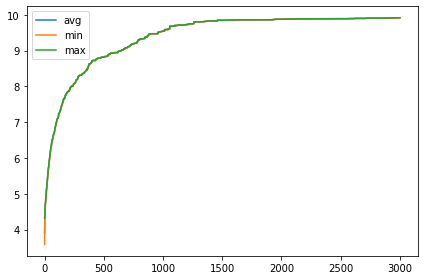

In [4]:

from function_opt.functions import rastrigin
if __name__ == "__main__":

    def function(x):
        res = rastrigin(x)
        return res,
    dimension = 100 # set to 100
    pop_size = 100 # max is 100
    iterations = 3000 # max is 10000
    scenario = SimpleGAExperiment(function, dimension, pop_size, iterations)
    log = scenario.run()
    from function_opt.draw_log import draw_log
    draw_log(log)
